In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [8]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [9]:
df = df.set_index('player')

In [10]:
df.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, Quincy Acy to Tyler Zeller
Data columns (total 30 columns):
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk             481 non-null i

In [12]:
df.isnull().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [13]:
df['fg.'].fillna(df['fg.'].mean(), inplace =True)
df['x3p.'].fillna(df['x3p.'].mean(), inplace =True)
df['x2p.'].fillna(df['x3p.'].mean(), inplace =True)
df['efg.'].fillna(df['x3p.'].mean(), inplace =True)
df['ft.'].fillna(df['ft.'].mean(), inplace =True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, Quincy Acy to Tyler Zeller
Data columns (total 30 columns):
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             481 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            481 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            481 non-null float64
efg.            481 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             481 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk             481 non-null i

In [15]:
df.drop(['bref_team_id','season','season_end'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, Quincy Acy to Tyler Zeller
Data columns (total 27 columns):
pos     481 non-null object
age     481 non-null int64
g       481 non-null int64
gs      481 non-null int64
mp      481 non-null int64
fg      481 non-null int64
fga     481 non-null int64
fg.     481 non-null float64
x3p     481 non-null int64
x3pa    481 non-null int64
x3p.    481 non-null float64
x2p     481 non-null int64
x2pa    481 non-null int64
x2p.    481 non-null float64
efg.    481 non-null float64
ft      481 non-null int64
fta     481 non-null int64
ft.     481 non-null float64
orb     481 non-null int64
drb     481 non-null int64
trb     481 non-null int64
ast     481 non-null int64
stl     481 non-null int64
blk     481 non-null int64
tov     481 non-null int64
pf      481 non-null int64
pts     481 non-null int64
dtypes: float64(5), int64(21), object(1)
memory usage: 105.2+ KB


In [16]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.465813,0.479938,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,147.223161,294.174554,0.105102,0.100141,103.667725,131.240639,0.156794,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,31.000000,67.000000,0.433824,0.451000,16.000000,22.000000,0.657000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,110.000000,227.000000,0.473779,0.487000,53.000000,73.000000,0.750000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,230.000000,459.000000,0.513120,0.525000,126.000000,179.000000,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


In [17]:
df = pd.get_dummies(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, Quincy Acy to Tyler Zeller
Data columns (total 33 columns):
age       481 non-null int64
g         481 non-null int64
gs        481 non-null int64
mp        481 non-null int64
fg        481 non-null int64
fga       481 non-null int64
fg.       481 non-null float64
x3p       481 non-null int64
x3pa      481 non-null int64
x3p.      481 non-null float64
x2p       481 non-null int64
x2pa      481 non-null int64
x2p.      481 non-null float64
efg.      481 non-null float64
ft        481 non-null int64
fta       481 non-null int64
ft.       481 non-null float64
orb       481 non-null int64
drb       481 non-null int64
trb       481 non-null int64
ast       481 non-null int64
stl       481 non-null int64
blk       481 non-null int64
tov       481 non-null int64
pf        481 non-null int64
pts       481 non-null int64
pos_C     481 non-null uint8
pos_F     481 non-null uint8
pos_G     481 non-null uint8
pos_PF    481 non-null uint8
po

In [18]:
X_cols = [col for col in df.columns if 'pts' not in col]
X = df.loc[:,X_cols]
y = df.loc[:,'pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nick Collison,33,81,0,1353,134,241,0.556,4,17,0.235294,130,224,0.580357,0.564,66,93,0.710000,116,177,293,104,30,28,71,187,0,0,0,1,0,0,0
George Hill,27,76,76,2434,272,616,0.442,95,260,0.365385,177,356,0.497191,0.519,142,176,0.807000,53,230,283,265,75,23,92,158,0,0,0,0,1,0,0
Troy Daniels,22,5,1,75,15,31,0.484,12,25,0.480000,3,6,0.500000,0.677,0,0,0.722419,0,4,4,5,0,0,3,6,0,0,0,0,0,0,1
Kelly Olynyk,22,70,9,1400,234,502,0.466,40,114,0.350877,194,388,0.500000,0.506,99,122,0.811000,140,225,365,109,35,27,106,227,1,0,0,0,0,0,0
Mike Dunleavy,33,82,61,2584,333,774,0.430,123,324,0.379630,210,450,0.466667,0.510,140,164,0.854000,46,299,345,186,64,46,108,163,0,0,0,0,0,1,0


In [19]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 162.7115787251776
RMSE value for k=  2 is: 150.90218357686035
RMSE value for k=  3 is: 153.40463667308342
RMSE value for k=  4 is: 150.5885149221091
RMSE value for k=  5 is: 155.14331843878534
RMSE value for k=  6 is: 151.45151921382734
RMSE value for k=  7 is: 157.55750328356712
RMSE value for k=  8 is: 158.5519177262433
RMSE value for k=  9 is: 160.8717061709181
RMSE value for k=  10 is: 163.7248344172584
RMSE value for k=  11 is: 170.74931607265694
RMSE value for k=  12 is: 172.12446779891488
RMSE value for k=  13 is: 172.409907188162
RMSE value for k=  14 is: 171.9908599898668
RMSE value for k=  15 is: 172.50495016918848
RMSE value for k=  16 is: 169.90116298795337
RMSE value for k=  17 is: 171.44244681021897
RMSE value for k=  18 is: 173.75705300221188
RMSE value for k=  19 is: 174.9316107820821
RMSE value for k=  20 is: 178.39303633612815


C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


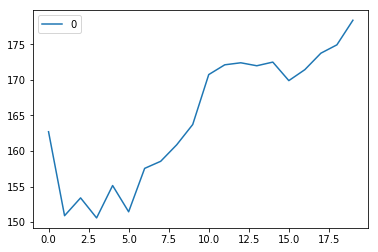

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [21]:
# The optimal value of k in the given situation
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 6}

model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train, y_train)
pred=model.predict(X_test)
y_test[0:10]

player
Chris Babb            22
Jordan Crawford      890
Shannon Brown         63
Andrew Nicholson     435
Jodie Meeks         1209
Andray Blatche       821
Julyan Stone          18
Mirza Teletovic      622
Patrick Mills        826
Manu Ginobili        838
Name: pts, dtype: int64

In [22]:
pred[0:10]

array([  45.33333333, 1064.66666667,   83.66666667,  465.66666667,
       1188.5       ,  751.16666667,   64.        ,  739.83333333,
        653.        ,  879.5       ])